In [2]:
from google.colab import files
uploaded = files.upload()

Saving machine.data.txt to machine.data.txt


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
col=['model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

In [0]:
data=pd.read_table('machine.data.txt',delimiter=',',names=col)

In [6]:
data.head()
data.shape

(209, 9)

In [0]:
y=data['ERP']
x=data.drop(['model','PRP','ERP'],axis=1)

In [8]:
x.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
adviser,125,256,6000,256,16,128
amdahl,29,8000,32000,32,8,32
amdahl,29,8000,32000,32,8,32
amdahl,29,8000,32000,32,8,32
amdahl,29,8000,16000,32,8,16


In [0]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.2,random_state =100)

In [11]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
model.score(x,y)

0.9108693747168685

In [0]:
pred_y=model.predict(x)

In [0]:
import statsmodels.formula.api as smf
model1=smf.ols('ERP~MMIN+MMAX+MYCT+CACH+CHMIN+CHMAX',data).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     344.1
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          3.92e-103
Time:                        03:12:44   Log-Likelihood:                -1097.2
No. Observations:                 209   AIC:                             2208.
Df Residuals:                     202   BIC:                             2232.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -66.4814      6.288    -10.574      0.000     -78.879     -54.084
MMIN           0.0143      0.001     10.021      0.000       0.011       0.017
MMAX           0.0066      0.001     13.138      0.000       0.006       0.008
MYCT           0.0660      0.014      4.818      0.000       0.039       0.093
CACH           0.4945      0.109      4.533      0.000       0.279       0.710
CHMIN         -0.1723      0.669     -0.258      0.797      -1.491       1.146
CHMAX          1.2012      0.172      6.985      0.000       0.862       1.540
==============================================================================
Omnibus:                      109.550   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1015.951
Skew:                           1.786   Prob(JB):                    2.45e-221
Kurtosis:                      13.193   Cond. No.                     3.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Auto Correlation




*  0 - 1.9 Positively Auto correlated.
*  2>>  NO Auto Correlation
* 2.1 - 4 >>  Negatively Auto correlated

In [0]:
residual=pred_y-y

# Heteroscedasticity

In [0]:
import seaborn as sns

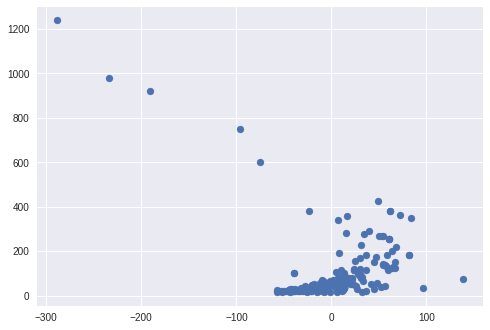

In [18]:
plt.scatter(residual,y)# Hetero

In [19]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model1.resid, model1.model.exog)
lzip(name, test)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[('F statistic', 0.6716348000556215), ('p-value', 0.9745729524352381)]

# Normality Check

In [0]:
import pylab 

In [21]:
stats.probplot(residual,dist='norm',plot=pylab) # Normality
pylab.show()

NameError: ignored

By graph , data is normally distributed

In [0]:
stats.shapiro(residual)

P value is greter than 5% so normality fails

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


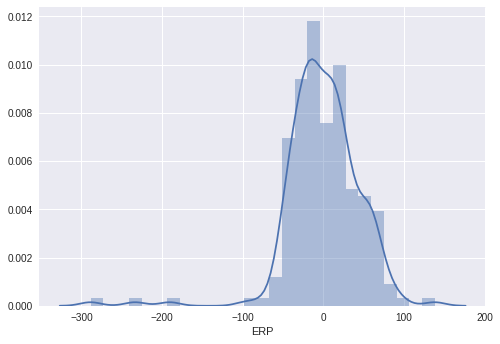

In [22]:
sns.distplot(residual)

Linearity check , heteroscedasticity

#VIF : Multicollinearity

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['feature']=x.columns

In [25]:
vif

,VIF Factor,feature
0,1.067222,MYCT
1,4.493385,MMIN
2,5.890977,MMAX
3,2.563899,CACH
4,2.890250,CHMIN
5,2.808009,CHMAX


#Linearity Check

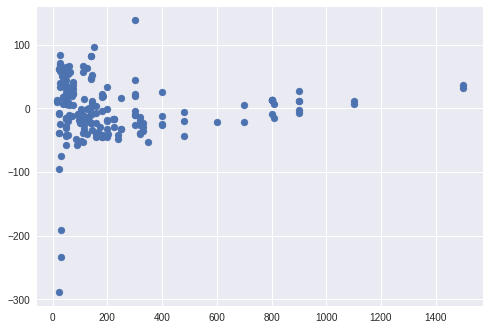

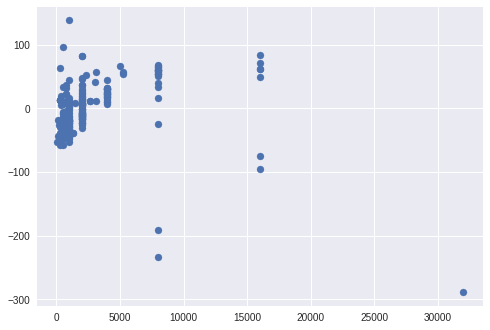

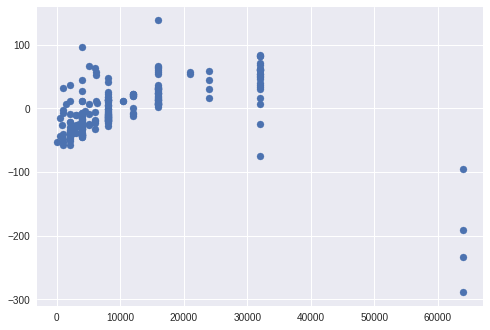

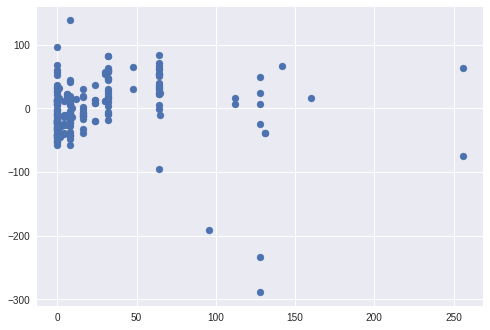

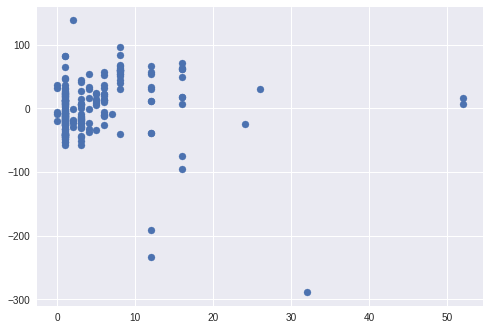

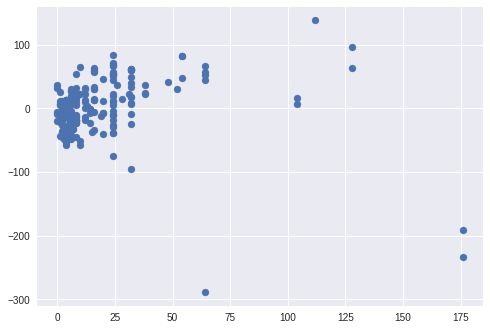

In [26]:
for a in x.columns:
  plt.scatter(x[a],residual)
  plt.show()

#Treating outlire

In [27]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x))
print(z)

[[0.30358614 0.67502598 0.49546221 5.69420785 1.66198873 4.23103334]
 [0.67332952 1.32629082 1.72704937 0.16762947 0.48550899 0.52947875]
 [0.67332952 1.32629082 1.72704937 0.16762947 0.48550899 0.52947875]
 ...
 [0.30358614 0.2243162  0.32449978 0.62188173 0.39685082 0.16456273]
 [1.06369405 0.60886675 0.32449978 0.16762947 0.69097076 0.70437278]
 [1.06369405 0.48275071 0.66642464 0.62188173 0.69097076 0.70437278]]


In [28]:
threshold = 3
print(np.where(z > threshold))

(array([  0,   0,   6,   7,   8,   8,   9,   9,   9,  82,  95,  96, 102,
       103, 122, 123, 137, 153, 156, 156, 168, 195, 196, 196, 197, 197,
       198, 198, 199, 199]), array([3, 5, 1, 1, 1, 2, 1, 2, 4, 5, 1, 1, 0, 0, 0, 0, 5, 1, 1, 3, 3, 4,
       4, 5, 4, 5, 2, 5, 2, 5]))


In [29]:
data_1 = data[(z < 3).all(axis=1)]
data_1.shape

(188, 9)

In [30]:
data_1

,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
amdahl,470v/7,29,8000,32000,32,8,32,269,253
amdahl,470v/7a,29,8000,32000,32,8,32,220,253
amdahl,470v/7b,29,8000,32000,32,8,32,172,253
amdahl,470v/7c,29,8000,16000,32,8,16,132,132
amdahl,470v/b,26,8000,32000,64,8,32,318,290
apollo,dn320,400,1000,3000,0,1,2,38,23
apollo,dn420,400,512,3500,4,1,6,40,24
basf,7/65,60,2000,8000,65,1,8,92,70
basf,7/68,50,4000,16000,65,1,8,138,117
bti,5000,350,64,64,0,1,4,10,15


In [0]:
x1 = data_1.drop(['ERP','CHMIN','model'],axis=1)
y1 = data_1['ERP']

In [0]:
lr1 = LinearRegression()
lr1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
pred_y1 = lr1.predict(x1)

In [0]:
residual_1 = pred_y1 - y1

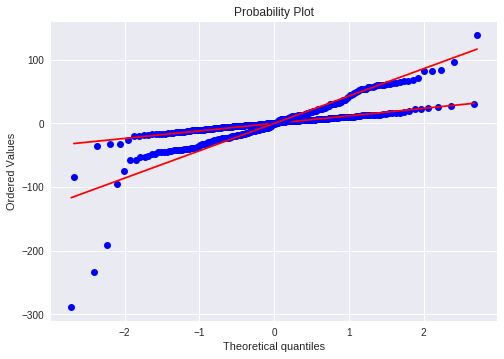

In [0]:
stats.probplot(residual_1,dist='norm',plot=pylab)
stats.probplot(residual,dist='norm',plot=pylab,)# Normality
pylab.show()

In [0]:
stats.shapiro(residual_1)

(0.8965590596199036, 3.8006056635175867e-10)

In [0]:
data.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000
